In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

In [3]:
# Define data generators for train, validation and test sets
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)


train_generator = train_datagen.flow_from_directory(
    r"/content/drive/MyDrive/archive (18)/dataset",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    r"/content/drive/MyDrive/archive (18)/dataset",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)



Found 1849 images belonging to 3 classes.
Found 462 images belonging to 3 classes.


In [4]:
# Get the class indices from the training generator
class_indices = train_generator.class_indices

# Extract class names
class_names = list(class_indices.keys())

print("Class indices:", class_indices)
print("Class names:", class_names)


Class indices: {'Raw Data': 0, 'train': 1, 'val': 2}
Class names: ['Raw Data', 'train', 'val']


In [8]:
# Define a Sequential model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [11]:
model.fit(train_generator,validation_data=val_generator,epochs=10)

Epoch 1/10
58/58 [==============================] - 219s 4s/step - loss: 0.3839 - accuracy: 0.7361 - val_loss: 0.4076 - val_accuracy: 0.7013
Epoch 2/10
58/58 [==============================] - 216s 4s/step - loss: 0.3598 - accuracy: 0.7317 - val_loss: 0.5036 - val_accuracy: 0.5281
Epoch 3/10
58/58 [==============================] - 216s 4s/step - loss: 0.3437 - accuracy: 0.7361 - val_loss: 0.4495 - val_accuracy: 0.6472
Epoch 4/10
58/58 [==============================] - 216s 4s/step - loss: 0.3346 - accuracy: 0.7415 - val_loss: 0.4314 - val_accuracy: 0.6580
Epoch 5/10
58/58 [==============================] - 220s 4s/step - loss: 0.3258 - accuracy: 0.7545 - val_loss: 0.4862 - val_accuracy: 0.5043
Epoch 6/10
58/58 [==============================] - 217s 4s/step - loss: 0.3075 - accuracy: 0.7507 - val_loss: 0.5278 - val_accuracy: 0.4524
Epoch 7/10
58/58 [==============================] - 215s 4s/step - loss: 0.2895 - accuracy: 0.7701 - val_loss: 0.6163 - val_accuracy: 0.3571
Epoch 8/10
58

In [12]:
model.save('/content/drive/MyDrive/archive (18)/dataset.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
model = load_model('/content/drive/MyDrive/archive (18)/dataset.h5')
print("Model Loaded")

Model Loaded


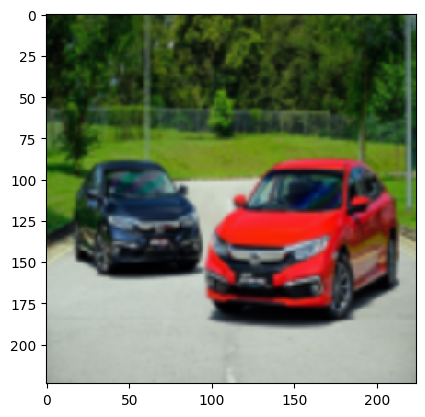

1/1 [==============================] - 0s 170ms/step
[[9.9972934e-01 2.7030762e-04 3.8703180e-07]]


In [16]:
# Load and view the image
from matplotlib import pyplot as plt
test_image_path = r"/content/drive/MyDrive/archive (18)/dataset/Raw Data/low_res/0.png"
img = image.load_img(test_image_path, target_size=(224, 224))

plt.imshow(img)
plt.axis()
plt.show()

#convert image into array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize the pixel values


# Make predictions
prediction = model.predict(img_array)
# Print the prediction
print(prediction)

In [17]:
#interprete the results
prediction = model.predict(img_array)
ind = np.argmax(prediction[0])
print(class_names[ind])

1/1 [==============================] - 0s 69ms/step
Raw Data
